In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
 
#preprocessing 
from sklearn.preprocessing import OneHotEncoder
#models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mba-admission-dataset/MBA.csv


In [2]:
df=pd.read_csv('/kaggle/input/mba-admission-dataset/MBA.csv')

df.head(3)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [4]:
df.isna().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [5]:
df['race']=df['race'].fillna('International')
df['admission']=df['admission'].fillna('Deny')
df.isna().sum()


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

In [6]:
'''
Visualizing the admission status
'''

'\nVisualizing the admission status\n'

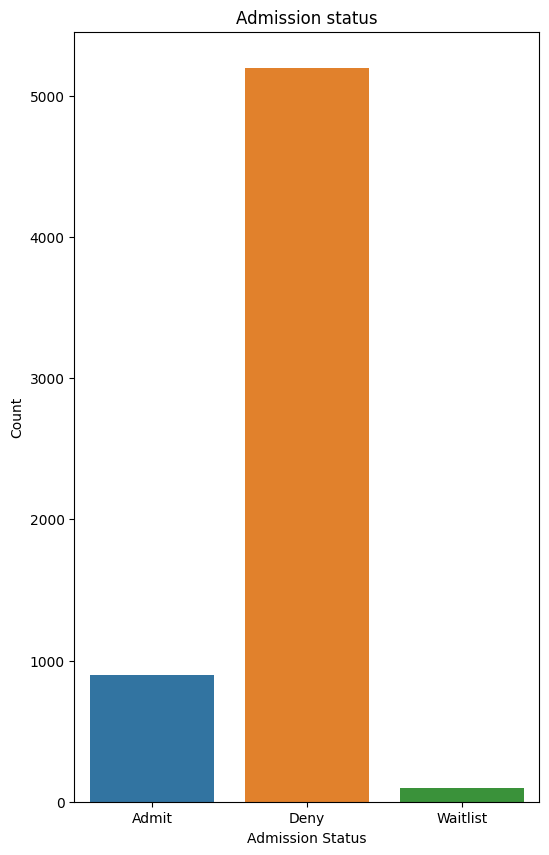

In [7]:
plt.figure(figsize=(6,10))
sns.countplot(x='admission',data=df)
plt.xlabel("Admission Status")
plt.ylabel('Count')
plt.title("Admission status")
plt.show()

In [8]:
'''
Data Preprocessing
'''

'\nData Preprocessing\n'

In [9]:
encoder=OneHotEncoder(sparse=False, drop='first')
col=['gender','major','international','race','work_industry']
one_hot_encoded=encoder.fit_transform(df[col])
df=df.drop(columns=col)
df_one_hot_encoded=pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())
df_encoded=pd.concat([df,df_one_hot_encoded],axis=1)
df_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,application_id,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,international_True,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,3.30,620.0,3.0,Admit,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3.28,680.0,5.0,Deny,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3.30,710.0,5.0,Admit,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,3.47,690.0,6.0,Deny,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,3.35,590.0,5.0,Deny,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6190,3.49,640.0,5.0,Deny,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6190,6191,3.18,670.0,4.0,Deny,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6191,6192,3.22,680.0,5.0,Admit,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6192,6193,3.36,590.0,5.0,Deny,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
X=df_encoded.drop(columns=['admission'])
y=df_encoded['admission']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
models={
    'logistic Regression':LogisticRegression(),
    'Desision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'k-NearestNeighbors':KNeighborsClassifier(),
    'Support Vector Machines': SVC()
}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {model_name} :{accuracy}")

Accuracy of logistic Regression :0.8246369015599785
Accuracy of Desision Tree :0.8111888111888111
Accuracy of Random Forest :0.842926304464766
Accuracy of k-NearestNeighbors :0.8095750403442711
Accuracy of Support Vector Machines :0.8203335126412049
